In [58]:
# Note in Colab you can type "pip install" directly in the notebook
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


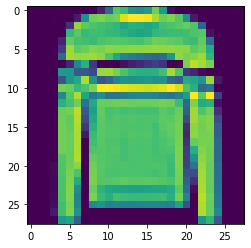

In [59]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [4]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [5]:
model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Convolution layer with 64 filters, each 3x3, stride of 1 (i.e., apply the filter at all pixel locations),
# no padding.
# • Max pool with a pooling width of 2x2, stride of 2, no padding.
# • ReLU.
# • Flatten the 64 feature maps into one long vector.
# • Fully-connected layer to map into a 1024-dimensional vector.
# • ReLU.
# • Fully-connected layer to map into a 10-dimensional vector.
# • Softmax.

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              11076608  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 11,087,498
Trainable params: 11,087,498
Non-trainable params: 0
____________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])

1719/1719 [==============================] - 215s 125ms/step - loss: 0.4695 - accuracy: 0.8326 - val_loss: 0.2871 - val_accuracy: 0.8992

Epoch 00001: val_loss improved from inf to 0.28712, saving model to model.weights.best.hdf5


In [10]:
#Load the weights with the best validation accuracy.
model.load_weights('model.weights.best.hdf5')

In [11]:
import h5py
f = h5py.File('model.weights.best.hdf5', 'r')

In [12]:
base_items = list(f.items())
print(base_items)

[('model_weights', <HDF5 group "/model_weights" (6 members)>), ('optimizer_weights', <HDF5 group "/optimizer_weights" (1 members)>)]


In [13]:
optimizer_weights = f.get('optimizer_weights')
optimizer_weights_items = list(optimizer_weights.items())
print(optimizer_weights_items)

[('Adam', <HDF5 group "/optimizer_weights/Adam" (4 members)>)]


In [15]:
Adam_weights = optimizer_weights.get('Adam')
Adam_weights_items = list(Adam_weights.items())
print(Adam_weights_items)

[('conv2d', <HDF5 group "/optimizer_weights/Adam/conv2d" (2 members)>), ('dense', <HDF5 group "/optimizer_weights/Adam/dense" (2 members)>), ('dense_1', <HDF5 group "/optimizer_weights/Adam/dense_1" (2 members)>), ('iter:0', <HDF5 dataset "iter:0": shape (), type "<i8">)]


In [16]:
conv2d = Adam_weights.get('conv2d')
conv2d_items = list(conv2d.items())
print(conv2d_items)

bias_Conv2d = conv2d.get('bias')
print(bias_Conv2d)

kernel_Conv2d = conv2d.get('kernel')
print(kernel_Conv2d)

bias_conv2d = np.array(bias_Conv2d.get('m:0'))
print(bias_conv2d)

kernel_conv2d = np.array(kernel_Conv2d.get('v:0'))
print(kernel_conv2d)

[('bias', <HDF5 group "/optimizer_weights/Adam/conv2d/bias" (2 members)>), ('kernel', <HDF5 group "/optimizer_weights/Adam/conv2d/kernel" (2 members)>)]
<HDF5 group "/optimizer_weights/Adam/conv2d/bias" (2 members)>
<HDF5 group "/optimizer_weights/Adam/conv2d/kernel" (2 members)>
[-1.31022098e-04 -1.07805589e-02  1.18607432e-02  1.29651710e-01
 -9.53524467e-03 -1.19264927e-02  2.17711162e-02 -1.98273500e-03
  3.22294584e-03  2.18585469e-02  1.44659616e-02  1.73575431e-02
  1.11893425e-02 -1.86502317e-03 -8.16864020e-04  1.92869417e-02
 -5.26732206e-03 -1.10835247e-02  2.12983135e-02  1.60276517e-02
 -9.20296181e-03  4.98792492e-02 -8.61302542e-04 -3.19724344e-03
  2.47570835e-02 -1.11336140e-02  2.66711004e-02 -3.95020917e-02
  4.02340554e-02 -1.72641873e-02  4.82160337e-02  1.37211069e-01
  1.31505048e-02 -4.66941623e-03  3.30273062e-02  1.90730654e-02
  2.89727864e-03  3.05294655e-02 -2.99745734e-04  3.80322710e-02
 -1.69181149e-03 -1.05423601e-02  1.43374344e-02  1.73133463e-02
  1.

In [17]:
dense = Adam_weights.get('dense')
dense_items = list(dense.items())
print(dense_items)

bias_Dense = dense.get('bias')
print(bias_Dense)

kernel_Dense = dense.get('kernel')
print(kernel_Dense)

bias_dense = np.array(bias_Dense.get('m:0'))
print(bias_dense)

kernel_dense = np.array(kernel_Dense.get('v:0'))
print(kernel_dense)

[('bias', <HDF5 group "/optimizer_weights/Adam/dense/bias" (2 members)>), ('kernel', <HDF5 group "/optimizer_weights/Adam/dense/kernel" (2 members)>)]
<HDF5 group "/optimizer_weights/Adam/dense/bias" (2 members)>
<HDF5 group "/optimizer_weights/Adam/dense/kernel" (2 members)>
[-1.9420270e-06  1.9397287e-04  1.6438364e-03 ... -4.8588039e-04
  4.8295531e-04  2.0296390e-04]
[[9.76655562e-12 9.40633942e-12 1.54223110e-11 ... 2.35056159e-11
  2.09561622e-12 1.29896215e-11]
 [2.28800784e-10 2.14604756e-09 7.15152382e-09 ... 1.15870014e-09
  4.99642716e-10 1.54540891e-09]
 [3.32102916e-13 6.81525808e-11 1.21263458e-10 ... 2.56305498e-11
  8.45961235e-12 3.27984341e-11]
 ...
 [7.04321670e-12 7.65792083e-11 1.81444623e-10 ... 3.28994401e-11
  5.78196345e-11 4.45822129e-11]
 [1.27017338e-11 4.75530171e-11 1.92963492e-10 ... 2.69916190e-11
  5.13558328e-11 6.80920181e-11]
 [4.77647755e-10 2.61913446e-09 2.25594814e-08 ... 2.40542097e-09
  8.93449092e-10 8.55023885e-10]]


In [18]:
dense_1 = Adam_weights.get('dense_1')
dense_1_items = list(dense_1.items())
print(dense_1_items)

bias_Dense_1 = dense_1.get('bias')
print(bias_Dense)

kernel_Dense_1 = dense_1.get('kernel')
print(kernel_Dense)

bias_dense_1 = np.array(bias_Dense_1.get('m:0'))
print(bias_dense_1)

kernel_dense_1 = np.array(kernel_Dense_1.get('v:0'))
print(kernel_dense_1)

[('bias', <HDF5 group "/optimizer_weights/Adam/dense_1/bias" (2 members)>), ('kernel', <HDF5 group "/optimizer_weights/Adam/dense_1/kernel" (2 members)>)]
<HDF5 group "/optimizer_weights/Adam/dense/bias" (2 members)>
<HDF5 group "/optimizer_weights/Adam/dense/kernel" (2 members)>
[ 0.00176949  0.00047284 -0.01102074  0.00472248  0.00952962 -0.00358101
 -0.00353573  0.00108146  0.00195546 -0.00139389]
[[1.8067051e-06 6.3781937e-07 3.6584368e-06 ... 2.3788316e-07
  2.3628118e-06 1.5298215e-07]
 [1.2694123e-04 3.1907439e-05 7.2421390e-05 ... 2.3981522e-06
  1.5677682e-05 1.5919943e-06]
 [2.4572404e-05 1.4649202e-05 1.4259572e-04 ... 8.4925423e-06
  1.2532688e-05 1.1983144e-05]
 ...
 [1.5830023e-05 3.1236081e-07 7.2437244e-05 ... 2.0061079e-06
  2.2145678e-06 2.7380838e-06]
 [8.4661017e-04 5.8744787e-05 1.4139167e-03 ... 7.6006922e-06
  1.5622668e-04 3.4247016e-06]
 [1.3480610e-05 2.2208901e-06 2.6558660e-05 ... 5.7591667e-05
  1.8236631e-05 1.1425300e-05]]


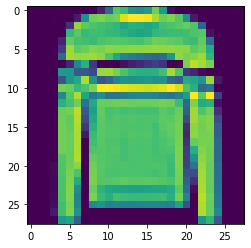

In [62]:
W = kernel_conv2d
X_tr = x_train[5].reshape(784,1)
plt.imshow(x_train[5])
plt.show()
b1 = bias_conv2d


def conv2D(W, X, b):
    z = np.dot(W, X) +b
    return z


In [63]:
def maxpool(Z, width, stride):
    img_length = int(np.sqrt(len(Z)))                   #=26 in our case
    img = np.reshape(Z, [img_length, img_length])     #=13 in our case
    pooled_img_length = int(img_length/stride)

    Pooled_img = np.empty([pooled_img_length, pooled_img_length])
    for i in range(0, pooled_img_length):
        for j in range(0, pooled_img_length):
            pixels = np.array([img[i*width, j*width], img[i*width, (j*width)+1], img[(i*width)+1, j*width], img[(i*width)+1, (j*width)+1]])
            Pooled_img[i, j] = np.max(pixels)

    return Pooled_img


In [64]:
Kernels = {}
Wts_row = {}
WEIGHTS_CONV2D = {}
Z_CONV2D = {}
Z_MAXPOOL = {}

#print(W)
W1 = W[0, 0, 0, :]
W2 = W[0, 1, 0, :]
W3 = W[0, 2, 0, :]
W4 = W[1, 0, 0, :]
W5 = W[1, 1, 0, :]
W6 = W[1, 2, 0, :]
W7 = W[2, 0, 0, :]
W8 = W[2, 1, 0, :]
W9 = W[2, 2, 0, :]

for i in range(0, 64):
    Kernels['K'+str(i)] = [[W1[i], W2[i], W3[i]],
                           [W4[i], W5[i], W6[i]],
                           [W7[i], W8[i], W9[i]]]

# print(Kernels['K'+str(42)])

for i in range(0, 64):
    V = Kernels['K' + str(i)]
    Zeros = np.zeros(25)
    Wts_row['Wts' + str(i)] = np.concatenate([V[0], Zeros, V[1], Zeros, V[2]])

Wts_row_length = np.size(Wts_row['Wts' + str(56)])      #All 'weights' rows are of same length
# print('Length of weights row: ', Wts_row_length)

#Generates indices where kernel has to be applied to get feature maps
Nos = np.arange(784)
Nos = np.reshape(Nos, [28, 28])
Nos = Nos[:, :-2]
Nos = np.ndarray.flatten(Nos)
# print(Nos)

for j in range(0, 64):
    WEIGHTS_CONV2D['w_conv' + str(j)] = np.concatenate([Wts_row['Wts' + str(j)], np.zeros(784 - Wts_row_length)])
    for i in range(1, 676):
        INDEX = Nos[i]
        ROW = np.concatenate([np.zeros(INDEX), Wts_row['Wts' + str(j)], np.zeros(784 - Wts_row_length - INDEX)])
        WEIGHTS_CONV2D['w_conv' + str(j)] = np.vstack([WEIGHTS_CONV2D['w_conv' + str(j)], ROW])

# print(np.shape(WEIGHTS_CONV2D))
# plt.matshow(WEIGHTS/np.max(WEIGHTS))
# plt.show()

for i in range(0, 64):
    Wi = WEIGHTS_CONV2D['w_conv' + str(i)]
    Z_CONV2D['z_conv2d'+str(i)] = conv2D(Wi, X_tr, b1[i]) 

for i in range(0, 64):
    Z_MAXPOOL['z_maxpool'+str(i)] = maxpool(Z_CONV2D['z_conv2d'+str(i)], 2, 2)

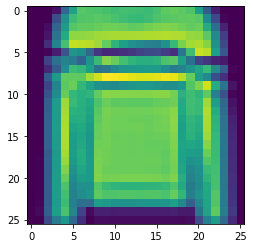

In [65]:
FEATURE_MAP = np.reshape(Z_CONV2D['z_conv2d'+str(33)], [26, 26])
plt.imshow(FEATURE_MAP)
plt.show()

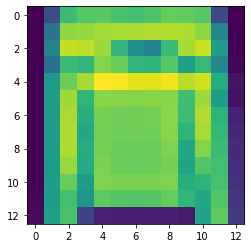

In [66]:
FEATURE_MAP_MAX_POOLING = np.reshape(Z_MAXPOOL['z_maxpool'+str(33)], [13, 13])
plt.imshow(FEATURE_MAP_MAX_POOLING)
plt.show()

In [67]:
Weight2 = kernel_dense
bias2 = bias_dense
Weight3 = kernel_dense_1
bias3 = bias_dense_1

In [68]:
def relu_function(z):
    h = np.maximum(z, 0)
    return h

def dense(H, W, b):
    z = np.dot(np.transpose(W), H) + b
    return z

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z), axis = 0, keepdims = True)

In [69]:
Z_RELU1={}

for i in range(0, 64):
    Z_RELU1['z_relu_one'+str(i)] = relu_function(Z_MAXPOOL['z_maxpool'+str(i)])

# print(np.shape(Z_RELU1['z_relu_one'+str(0)]))

Z_FLATTENED = np.ndarray.flatten(Z_RELU1['z_relu_one'+str(0)])
for i in range(1, 64):
    Z_FLATTENED = np.concatenate([Z_FLATTENED, np.ndarray.flatten( Z_RELU1['z_relu_one'+str(i)])])

# print(np.shape(Z_FLATTENED))
Z_DENSE1 = dense(Z_FLATTENED, Weight2, bias2)
Z_RELU2 = relu_function(Z_DENSE1)
Z_DENSE2 = dense(Z_RELU2, Weight3, bias3)
SOFTMAX = softmax(Z_DENSE2)

In [70]:
print(SOFTMAX)

[0.10017616 0.10004449 0.09890372 0.1004721  0.10095862 0.09963971
 0.09964868 0.10010561 0.10019293 0.09985799]


In [71]:
x = x_train[890].reshape(1,28,28,1)
y_hat = model.predict(x)
print(y_hat)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
